**Import Libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
from collections import Counter
!pip install dataprep
import dataprep
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 KB 20.

**Import Dataset**

In [2]:
df_test=pd.read_csv("SalaryData_Test.csv")
df_train=pd.read_csv("SalaryData_Train.csv")

In [3]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [10]:
# Merging Train and Test Data
raw_data = df_train.append(df_test)
raw_data.reset_index(inplace=True)
raw_data

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [12]:
raw_data.shape

(45221, 15)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          45221 non-null  int64 
 1   age            45221 non-null  int64 
 2   workclass      45221 non-null  object
 3   education      45221 non-null  object
 4   educationno    45221 non-null  int64 
 5   maritalstatus  45221 non-null  object
 6   occupation     45221 non-null  object
 7   relationship   45221 non-null  object
 8   race           45221 non-null  object
 9   sex            45221 non-null  object
 10  capitalgain    45221 non-null  int64 
 11  capitalloss    45221 non-null  int64 
 12  hoursperweek   45221 non-null  int64 
 13  native         45221 non-null  object
 14  Salary         45221 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [14]:
# Missing Values
raw_data.isnull().sum()

index            0
age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
# Duplicated Rows
raw_data[raw_data.duplicated()]

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [16]:
raw_data[raw_data.duplicated()].shape

(0, 15)

In [17]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 6


,index,age,educationno,capitalgain,capitalloss,hoursperweek
0,0,39,13,2174,0,40
1,1,50,13,0,0,13
2,2,38,9,0,0,40
3,3,53,7,0,0,40
4,4,28,13,0,0,40


In [18]:
# Discrete Feauture
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


In [19]:
# Countinuous Feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 5


In [21]:
# Find categorical variables
categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [22]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [23]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts()/np.float(len(raw_data)))

 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: education, dtype: float64
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: maritalstatus, dtype: float64
 Craft-repair         0.13312

<ipython-input-23-704453cace2b>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(raw_data[var].value_counts()/np.float(len(raw_data)))


In [24]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


**We can see that native column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.**

In [25]:
raw_data.corr()

,index,age,educationno,capitalgain,capitalloss,hoursperweek
index,1.000000,-0.003723,0.000634,-0.001517,-0.002175,-0.002257
age,-0.003723,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.000634,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,-0.001517,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,-0.002175,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,-0.002257,0.101992,0.146206,0.083880,0.054220,1.000000


# Visualizations

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

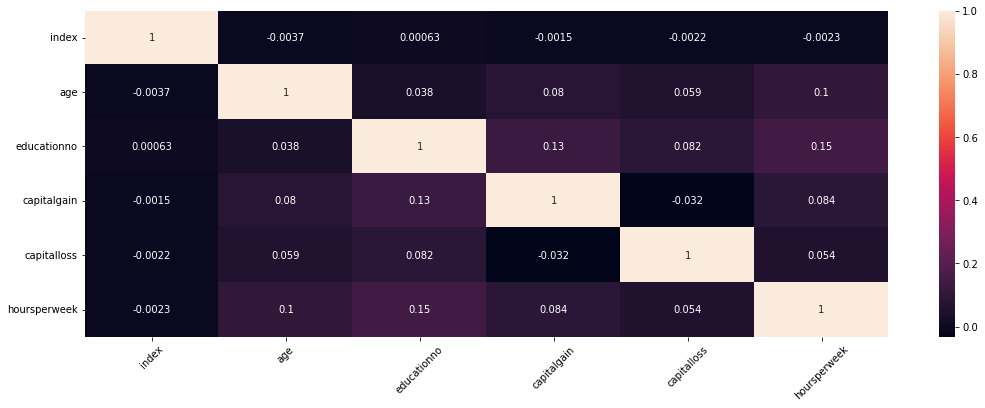

In [27]:
fig= plt.figure(figsize=(18, 6))
sb.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

**The Scatter matrix does not reveal any clear relationship among age, education, capitalgain, capitalloss and Hoursperweek.**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


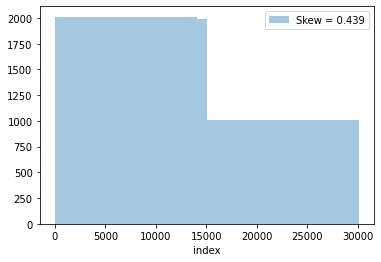

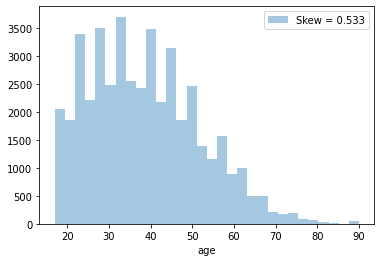

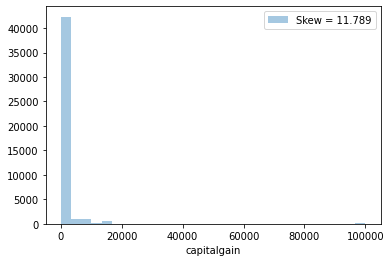

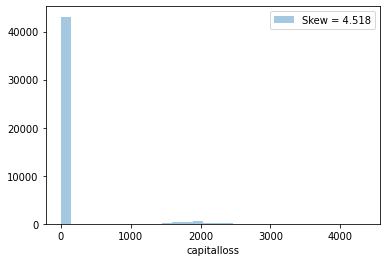

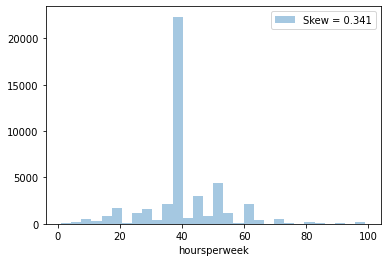

In [29]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sb.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

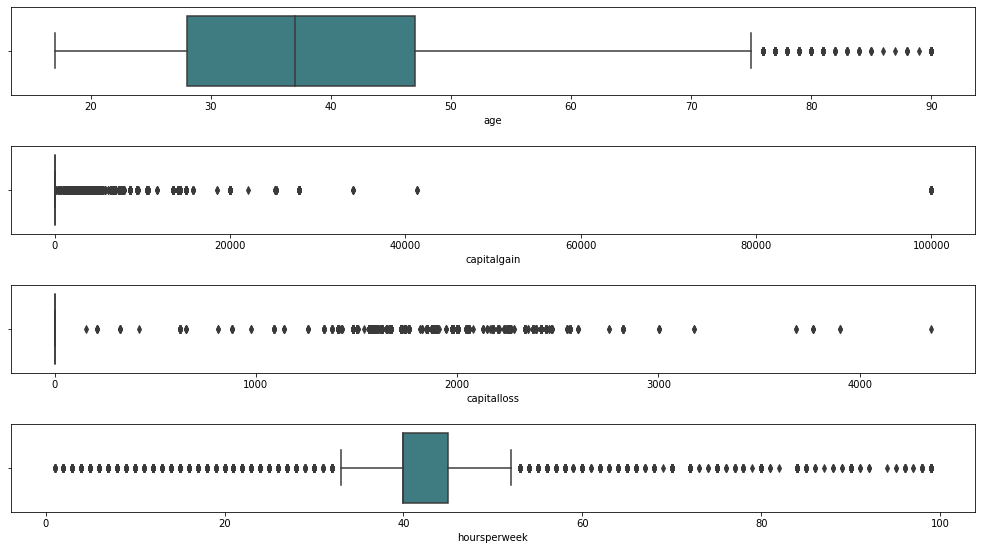

In [30]:
# Outliers Detection
ot=raw_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sb.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sb.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sb.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sb.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

**There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building.**

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


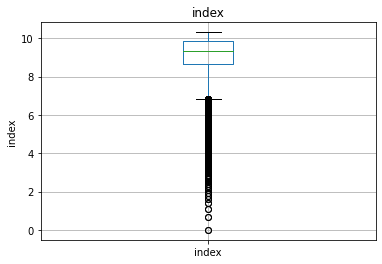

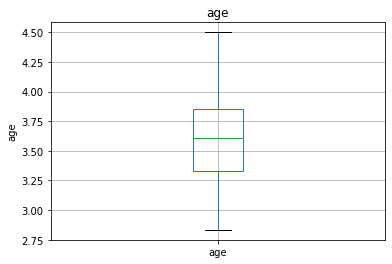

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


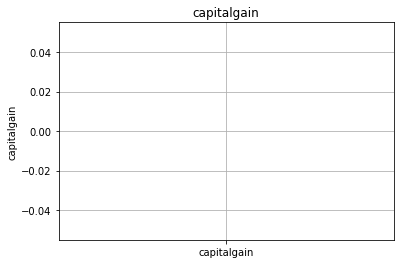

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


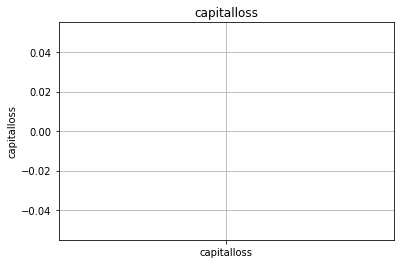

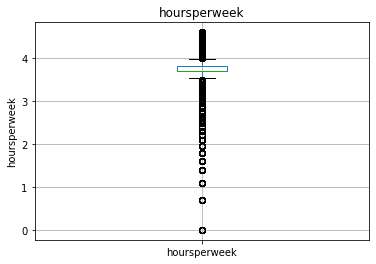

In [31]:
# Applying Log Transformation
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [35]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
categorical_features

Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

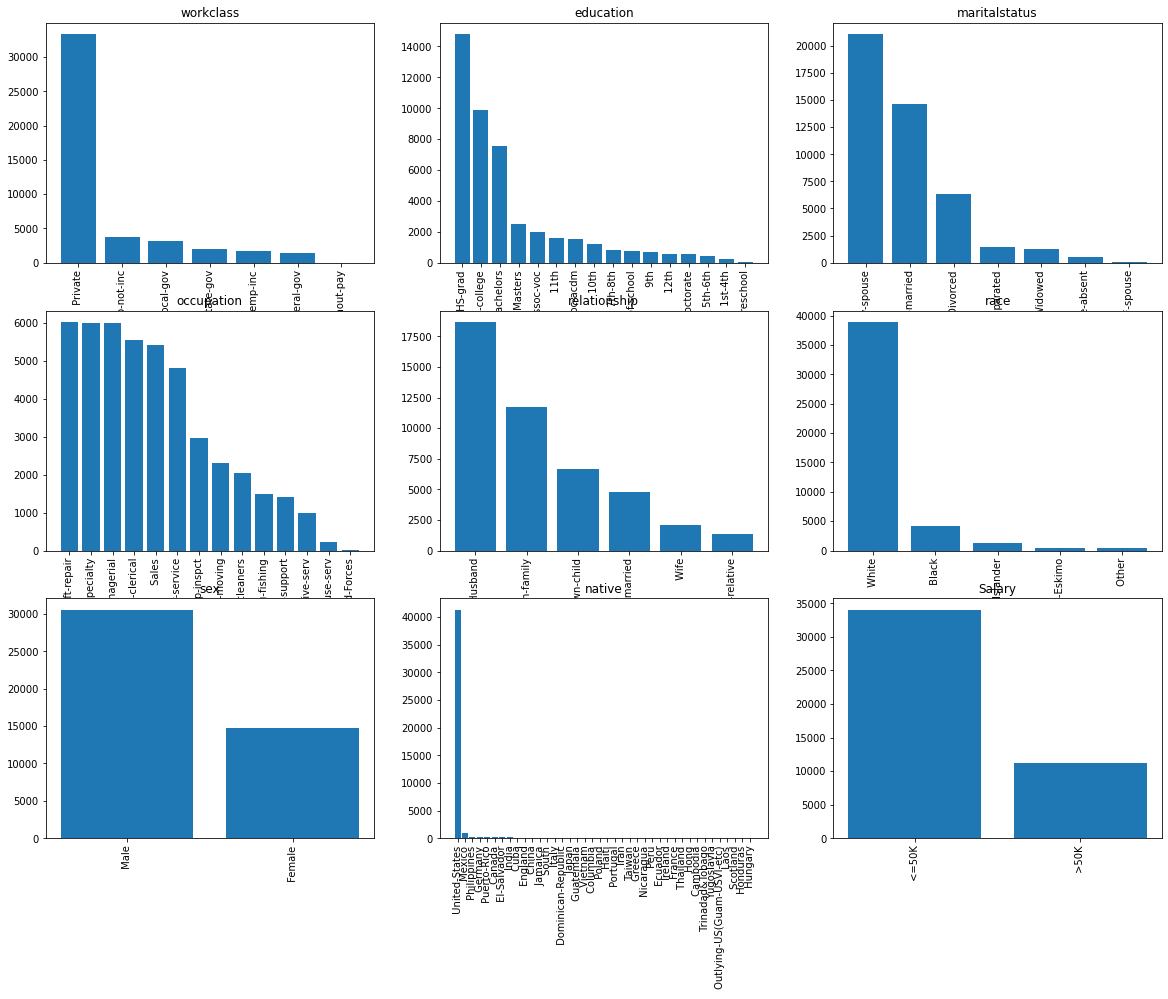

In [34]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical_features:
    value_counts = raw_data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Text(0.5, 1.0, 'Working Class')

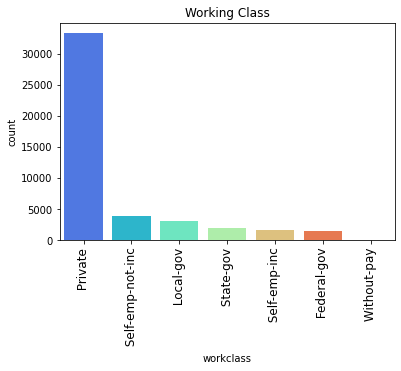

In [36]:
# Bar Plot
pal = sb.color_palette('rainbow')
sb.countplot(x='workclass', data=raw_data, palette = pal, 
              order=raw_data['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Sex')

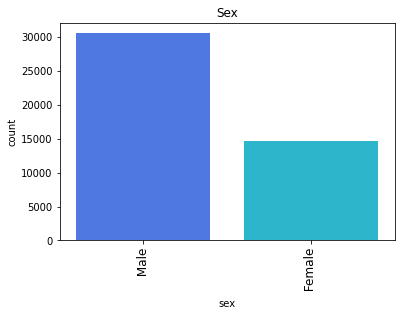

In [37]:
sb.countplot(x='sex', data=raw_data, palette = pal, 
              order=raw_data['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

**Analyzing the relationship of categorical features with respect to the Target feature.**

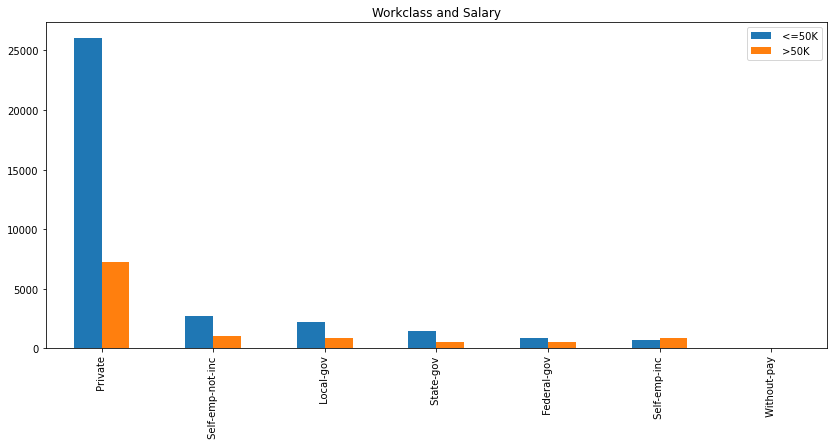

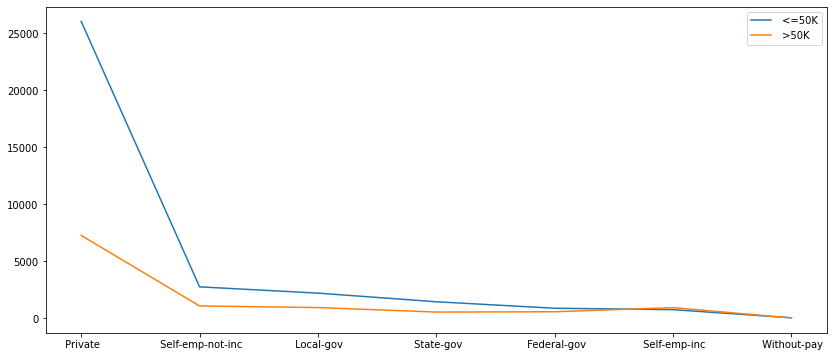

In [38]:
#workclass and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['workclass'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['workclass'].value_counts()
j_df.plot.bar(title = 'Workclass and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

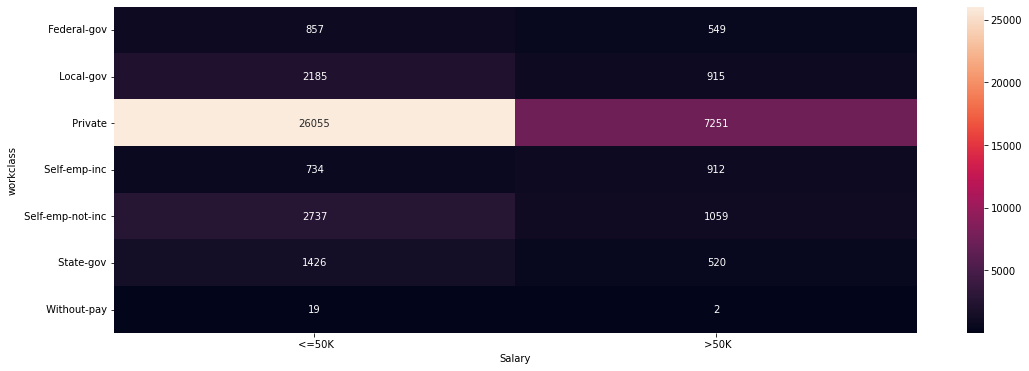

In [39]:
fig= plt.figure(figsize=(18, 6))
sb.heatmap(pd.crosstab(index=raw_data['workclass'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

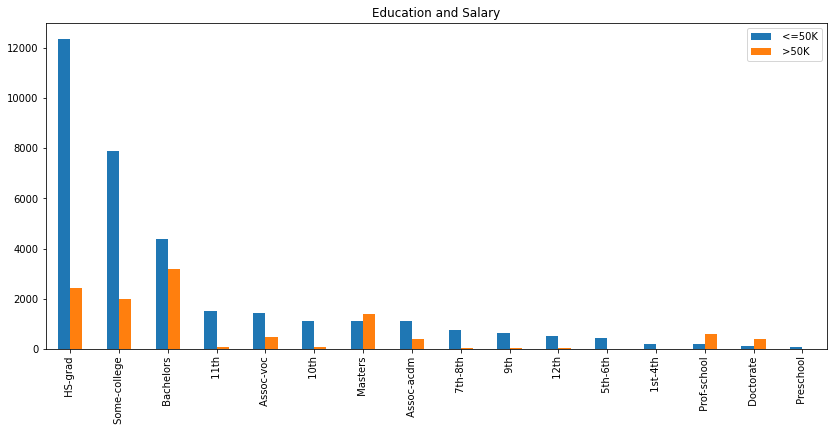

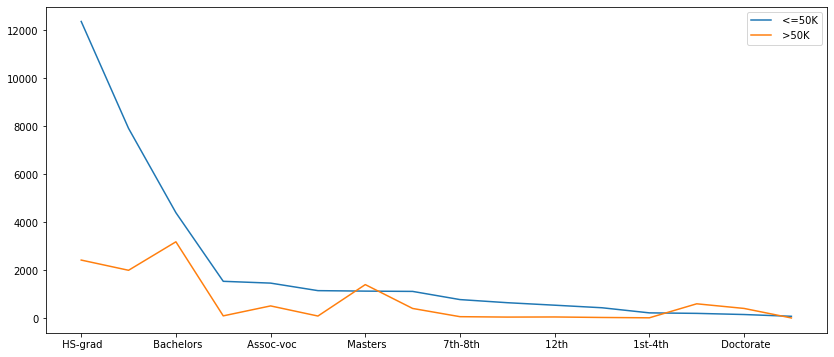

In [40]:
# Education and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['education'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['education'].value_counts()
j_df.plot.bar(title = 'Education and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

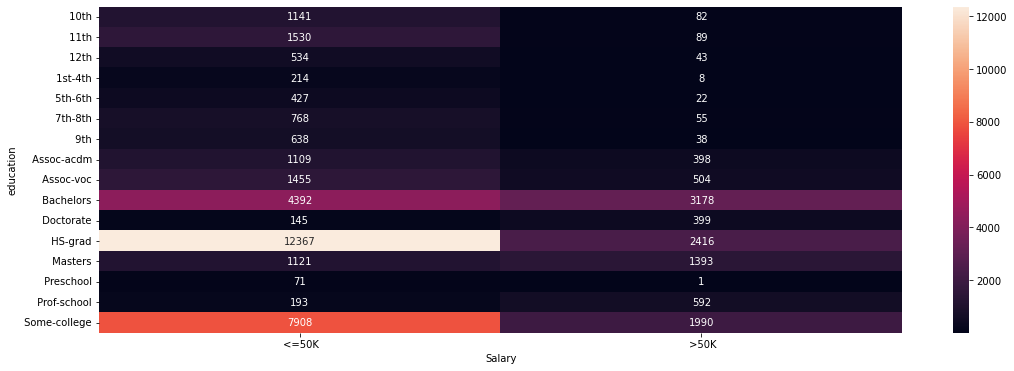

In [41]:
fig= plt.figure(figsize=(18, 6))
sb.heatmap(pd.crosstab(index=raw_data['education'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

# Data Preprocessing

In [42]:
data_ = raw_data.copy()
data_.drop('Salary',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:])
data_.head()

,index,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,50,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,38,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,53,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,28,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data_['Salary'] = raw_data.Salary
data_.head()

,index,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,0,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,1,50,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,2,38,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,3,53,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,4,28,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [44]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
le.fit(data_["Salary"])
data_["Salary"]=le.transform(data_["Salary"])
data_.head()

,index,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,0,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,50,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,38,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,53,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,28,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Label Encoding of categrical variables
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df= raw_data.copy()
# Encode labels in column 'species'.
df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)
#df["Salary"]=label_encoder.fit_transform(df["Salary"])

df.head(10)

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


**Train Test Split**

In [46]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 30612, 1: 10087}) Testing Data Counter({0: 3401, 1: 1121})


In [49]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [52]:
from sklearn.naive_bayes import MultinomialNB

rf_clf = MultinomialNB()
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 77.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.792398      0.628307  0.776702      0.710353      0.751729
recall         0.952731      0.242490  0.776702      0.597611      0.776702
f1-score       0.865199      0.349928  0.776702      0.607564      0.737492
support    30612.000000  10087.000000  0.776702  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[29165  1447]
 [ 7641  2446]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.795482     0.641425  0.780186     0.718454      0.757292
recall        0.952661     0.256913  0.780186     0.604787      0.780186
f1-score      0.867006     0.366879  0.780186     0.616942      0.743025
support    34

In [53]:
from sklearn.naive_bayes import GaussianNB

rf_clf = GaussianNB()
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 79.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.809949      0.676525  0.794098      0.743237      0.776881
recall         0.948909      0.324279  0.794098      0.636594      0.794098
f1-score       0.873939      0.438413  0.794098      0.656176      0.765997
support    30612.000000  10087.000000  0.794098  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[29048  1564]
 [ 6816  3271]]

Test Result:
Accuracy Score: 79.92%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.813743     0.693989  0.799204     0.753866      0.784056
recall        0.950603     0.339875  0.799204     0.645239      0.799204
f1-score      0.876865     0.456287  0.799204     0.666576      0.772604
support    34

In [54]:
from sklearn.naive_bayes import CategoricalNB

rf_clf = CategoricalNB()
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 88.99%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.922378      0.786936  0.889874      0.854657      0.888810
recall         0.932020      0.761971  0.889874      0.846995      0.889874
f1-score       0.927174      0.774252  0.889874      0.850713      0.889273
support    30612.000000  10087.000000  0.889874  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[28531  2081]
 [ 2401  7686]]

Test Result:
Accuracy Score: 85.29%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.899533     0.707650  0.852941     0.803591      0.851965
recall        0.905616     0.693131  0.852941     0.799374      0.852941
f1-score      0.902564     0.700315  0.852941     0.801440      0.852427
support    34